<img src="logo.png" alt="Logo IFNMG" width="200">
<h1 style="text-align:center;"> Tópicos em IC: Análise exploratória de dados.</h1>
<p>Equipe: David Jansen, Iarah Gonçalves de Almeida, Paulo Borges</p>

<h2>1) Introdução</h2>
<p> A análise de dados será feita sobre o 
<a href="http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29">Breast Cancer Wisconsin (Prognostic) Data Set.</a> A manipulação dos dados para análise será feita utilizando a linguagem Python no ambiente Jupyter.</p>

<h2>2) Informação dos Atributos </h2>

<p> 1) ID number </p>

<p> 2) Outcome (R = recur, N = nonrecur) </p>

<p> 3) Time (recurrence time if field 2 = R, disease-free time if field 2	= N) </p>

<p> 4-33) Ten real-valued features are computed for each cell nucleus: </p>

<ol>
    <li> radius (mean of distances from center to points on the perimeter) </li>
    <li> texture (standard deviation of gray-scale values) </li>
    <li> perimeter </li>
    <li> area </li>
	<li> smoothness (local variation in radius lengths) </li>
	<li> compactness (perimeter^2 / area - 1.0) </li>
	<li> concavity (severity of concave portions of the contour) </li>
	<li> concave points (number of concave portions of the contour) </li>
	<li> symmetry </li>
	<li> fractal dimension ("coastline approximation" - 1) </li>
</ol>

<p> Several of the papers listed above contain detailed descriptions of how these features are computed. </p>

<p>The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 4 is Mean Radius, field 14 is Radius SE, field 24 is Worst Radius. </p>

<p> Values for features 4-33 are recoded with four significant digits. <p>

<p> 34) Tumor size - diameter of the excised tumor in centimeters </p>
<p> 35) Lymph node status - number of positive axillary lymph nodes observed at time of surgery. </p>

<h2>3) Preparação do Ambiente Jupyter</h2>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [16]:
#URL onde se encontra a base de dados.
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'

#Nomeação das colunas.
names = ['id_number', 'outcome', 'time', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

#Leitura do arquivo para o formato csv.
wpbc = pd.read_csv(urlopen(UCI_data_URL), names=names)

#Mostrando resultado em forma de tabela (10 primeiros).
wpbc.head(10)

,id_number,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


<h2>4) Tratamento do Conjunto de Dados para análise</h2>

<p> O atributo 'outcome' está representado com um objeto string. Faremos um mapeamento do atributo para valores numéricos, onde N = 0.0 e R = 1.0. Isso ajuda na plotagem de gráficos e na aplicação de alguns modelos.</p>

<p> Algumas informações podem ser obtidadas através do arquivo <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names">wpbc.names</a>:</p>

<ul>
    <li> O atributo 'lymph_node_status' está ausente em 4 amostras.</li>
    <li> 151 amostras não apresentam recorrência('outcome' = 0), 47 apresentam recorrência('outcome' = 1).</li>
</ul>

<p> Dada a primeira informação na lista acima, iremos retirar essas 4 amostras de nossa análise.</p>

<p> As entradas da tabela serão passadas para o formato <b><i>float64</i></b>.<p>
    
<p> As colunas <b><i>id_number, time</i></b> serão removidas do nosso conjunto de dados por não se tratarem de informações relevantes em nossa análise.

In [17]:
# Mapeia a coluna 'outcome' para valores numéricos, 'R' de recur será 1, 'N' de nonrecur será 0
wpbc['outcome'] = wpbc['outcome'].map({'R':1.0, 'N':0.0})

# Retira os 4 valores null da coluna 'lymph_node_status'
wpbc = wpbc[wpbc['lymph_node_status'] != '?']

# Converte todo o dataframe para float64
wpbc = wpbc.astype('float64')

#Removendo colunas "id_number" e "time"
wpbc = wpbc.drop(columns=['id_number', 'time'])

# Reseta os indices para não ter falha dos valores retirados
wpbc.reset_index(inplace=True)

wpbc.head(10)

,index,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,0,0.0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,1,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,2,0.0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
5,5,1.0,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0
6,7,1.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10.0
7,8,0.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1.0
8,9,0.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20.0
9,10,0.0,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0.0


<h2>5) Informações da tabela </h2>

<p> Podemos ter mais algumas informações estatísticas do conjunto de dados, usando a função <b><i>describe</i></b>. Informações dos tipos de dados, podem ser obtidos com a função <b><i>info</i></b>.</p>

In [18]:
wpbc.describe()

,index,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,98.907216,0.237113,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,56.842767,0.426413,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,0.000000,0.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,50.250000,0.000000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,99.500000,0.000000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,147.750000,0.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,197.000000,1.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [19]:
wpbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 34 columns):
index                      194 non-null int64
outcome                    194 non-null float64
radius_mean                194 non-null float64
texture_mean               194 non-null float64
perimeter_mean             194 non-null float64
area_mean                  194 non-null float64
smoothness_mean            194 non-null float64
compactness_mean           194 non-null float64
concavity_mean             194 non-null float64
concave_points_mean        194 non-null float64
symmetry_mean              194 non-null float64
fractal_dimension_mean     194 non-null float64
radius_se                  194 non-null float64
texture_se                 194 non-null float64
perimeter_se               194 non-null float64
area_se                    194 non-null float64
smoothness_se              194 non-null float64
compactness_se             194 non-null float64
concavity_se               194 no

<h2>6) Exploração de Dados</h2>

<p>Em nosso <a href="https://github.com/DWalterJansen/topicosIC/blob/master/Equipe/Trabalho%20Intermedi%C3%A1rio/trabalho_intermediario.ipynb">trabalho intermediário</a>, analisamos apenas as caracteristicas de valor médio(_mean), tumor_size, e lymph_node_status para avaliar a influência na recorrência ou não recorrência do cancêr de mama. Os resultados lá obtidos, nos motivaram à apronfunar na análise. Nessa versão final do trabalho para a disciplina, iremos aumentar o número de características observadas e aplica-lás em alguns modelos de classificação.</p>

<p>A fim de identificar outras caracterísitcas que mais impactam na recorrência, podemos plotar histogramas das classes recorrentes e não recorrentes. Se esses histogramas estão separados com base na característica, podemos dizer que essa característica é importante para distinguir a recorrência do câncer.</p>

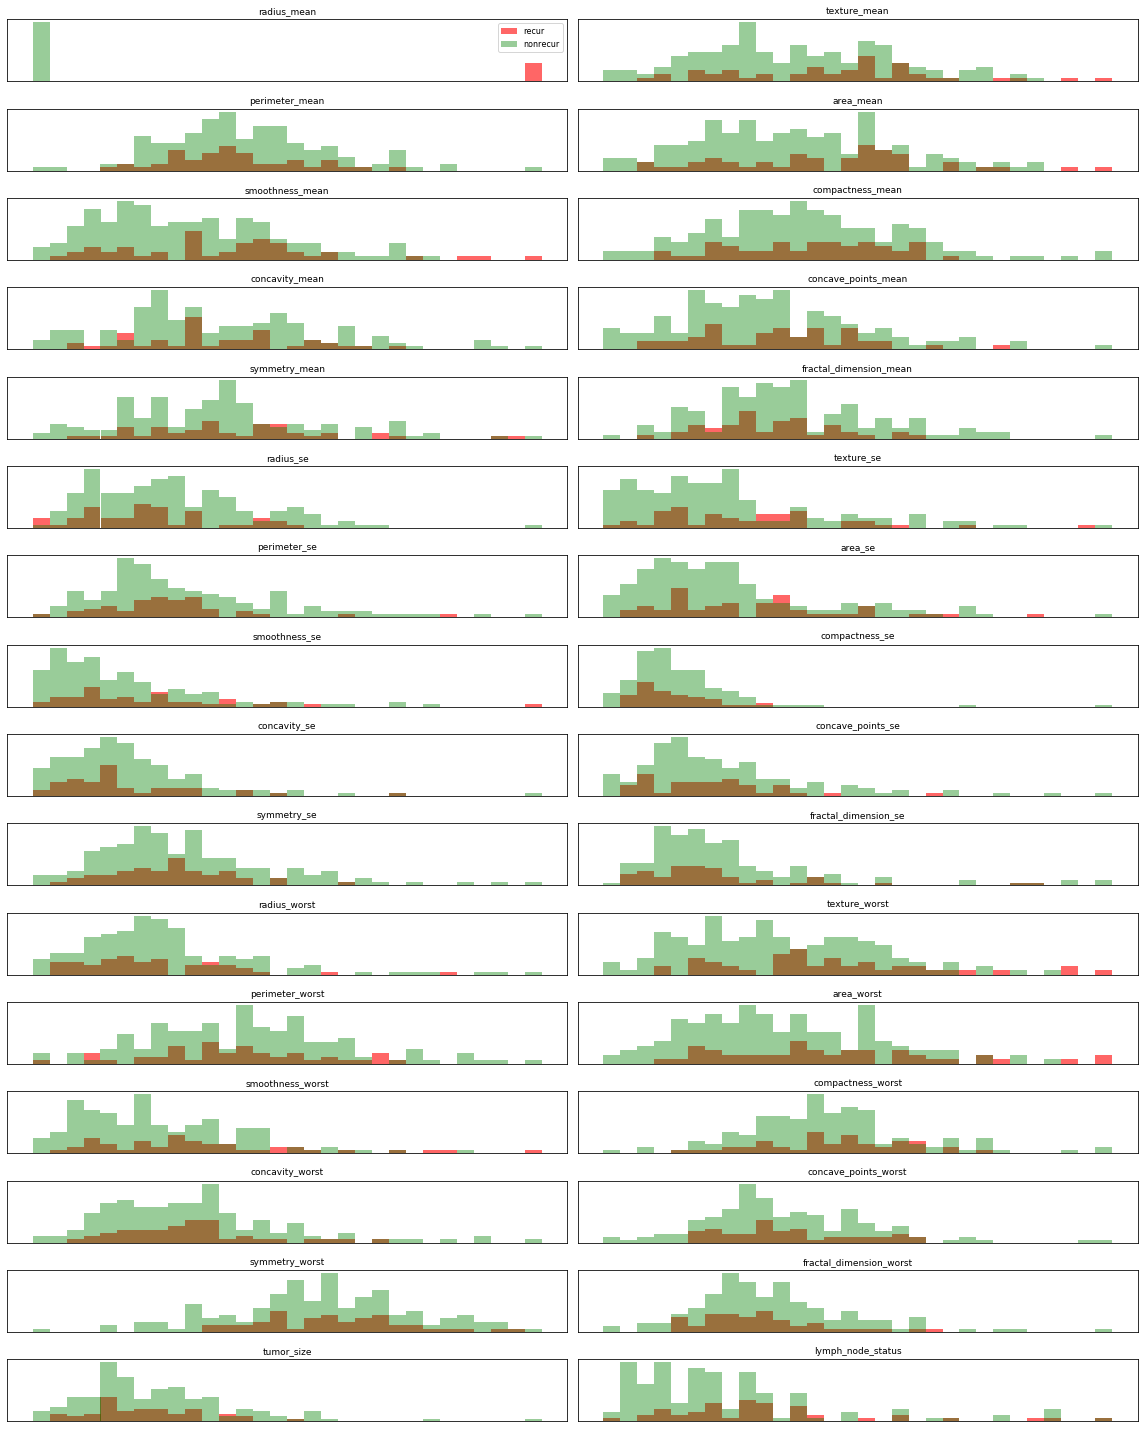

In [20]:
fig, axes = plt.subplots(16,2, figsize=(16, 20)) # 2 colounas com cada uma contendo 16 figuras, totalizando 32 características

recur = wpbc[wpbc.outcome == 1] # define a classe recorrente
nonrecur = wpbc[wpbc.outcome == 0] # define a classe não recorrente

ax = axes.ravel() # eixos achatados

for i in range(32):
  _, bins = np.histogram(wpbc.values[:, i + 1], bins = 30) # i + 1 para remover a coluna outcome
  ax[i].hist(recur.values[:, i + 1], bins = bins, color = 'r', alpha = 0.6) # vermelho para a classe recorrente
  ax[i].hist(nonrecur.values[:, i + 1], bins = bins, color = 'g', alpha = 0.4) # o valor alpha determina a transparência para a região sobreposta
  ax[i].set_title(names[i + 3], fontsize = 9) # i + 3 para remover as colunas id_number, outcome e time
  ax[i].axes.get_xaxis().set_visible(False) # o eixo x não nos é útil, uma vez que só desejamos ver a separação das classes
  ax[i].set_yticks(())

ax[0].legend(['recur', 'nonrecur'], loc = 'best', fontsize = 8)
plt.tight_layout()
plt.show()

<p>Pela separação dos histogramas acima, podemos identificar que algumas características possam ter maior influência no resultado (<b><i>outcome</b></i>), como <b><i>radius_mean</b></i>, <b><i>perimeter_mean</b></i>, <b><i>area_mean</b></i>, <b><i>radius_worst</b></i>, <b><i>perimeter_worst</b></i> e <b><i>area_worst</b></i>.</p>

<h3>6.1) Floresta Aleatória com conjunto de treinamento e teste</h3>

<p>Iniciamos usando uma <b><i>RandomForestClassifier</i></b> aplicada ao nosso dataframe <b><i>wpbc</i></b>, onde usaremos as 32 caracterísicas para fazer a predição do valor na coluna <b><i>outcome</i></b>.

<h4>6.1.1) Procedimentos para classificação</h4>

<p>Primeiramente, vamos separar nossas colunas em dependentes e independentes, e então separar o cojunto de treinamento (70% das amostras) e o conjunto de teste (30% das amostras):</p>

<h4>6.1.2) Treinamento do Modelo e Resultado do treinamento</h4>

<p>Depois de separarmos os conjuntos, podemos aplicar o treinamento. Em seguida, verificamos a precisão do modelo, que nos diz quão frequente nosso classificador estará correto:</p>

In [21]:
# Separa as colunas em dependentes e independentes

from sklearn.model_selection import train_test_split

namesrfc = ['radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

X = wpbc[namesrfc]  # Características
y = wpbc['outcome']  # Rótulo


# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier
# Importa 'metrics' de 'sklearn'
from sklearn import metrics

# Cria um classificador gaussiano
clf = RandomForestClassifier(n_estimators = 200)

best_precision = 0.0000
for i in range(50):
    # Separa os dados em conjunto de treinamento e conjunto de teste
    # 70% das amostras destinadas para o treinamento e 30% para teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    for k in range (15):
        # Treina o modelo usando o conjunto de treinamento
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Modelo de precisão, que diz quão frequente o classificador está correto
        precision = metrics.accuracy_score(y_test, y_pred)
        if best_precision < precision:
            best_precision = precision
            clf_best = clf
            y_test_best = y_test
            y_pred_best = y_pred

In [22]:
print("Precisão:", best_precision)

Precisão: 0.864406779661017


<h3>Cálculo pelo K-fold</h3>

In [86]:
# Separa as colunas em dependentes e independentes

namesrfc = ['radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

X = wpbc[namesrfc]  # Características
y = wpbc['outcome']  # Rótulo


# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier
# Importa 'metrics' de 'sklearn'
from sklearn import metrics

# Cria um classificador gaussiano
clf = RandomForestClassifier(n_estimators = 200)

# Importa o K-fold para separar entre treino e teste
from sklearn.model_selection import KFold

# Valor do K (número de divisões na base de dados)
kf = KFold(n_splits=10)


best_precision = 0.0000

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treina o modelo usando o conjunto de treinamento
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Modelo de precisão, que diz quão frequente o classificador está correto
    precision = metrics.accuracy_score(y_test, y_pred)
    if best_precision < precision:
        best_precision = precision
        clf_best = clf
        y_test_best = y_test
        y_pred_best = y_pred

In [87]:
print("Precisão:", best_precision)

Precisão: 1.0


<h4>6.1.3) Variáveis:</h4>

<p>Abaixo exibimos o valor das variáveis que obtiveram o resultado acima:</p>

In [88]:
#Conjunto para teste
print(y_test_best)

175    0.0
176    0.0
177    0.0
178    0.0
179    0.0
180    0.0
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
188    0.0
189    0.0
190    0.0
191    0.0
192    0.0
193    0.0
Name: outcome, dtype: float64


In [89]:
#Conjunto para predição
print(y_pred_best)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h4>6.1.4) Importância das Variáveis:</h4>

<p>Uma outra importante funcionalidade da <b><i>RandomForestClassifier</i></b> é a possibilidade de exibirmos a importância das características para o modelo.</p>

In [90]:
# Ordenação das as características importantes pela pontuação
print("Características ordenadas pela pontuação:")
# O número dentro de round é o limite de casas decimais
result = sorted(zip(map(lambda x: round(x, 6), clf_best.feature_importances_), namesrfc), reverse=True)
print(result)

# Criando dataframe com o resultado
df = pd.DataFrame(data=result)
df = df.rename(index=str, columns={0: "importance", 1: "feature"})

Características ordenadas pela pontuação:
[(0.041922, 'smoothness_worst'), (0.040595, 'lymph_node_status'), (0.039078, 'perimeter_se'), (0.038241, 'symmetry_mean'), (0.037791, 'tumor_size'), (0.036589, 'concavity_se'), (0.035693, 'fractal_dimension_mean'), (0.034908, 'area_worst'), (0.034728, 'concave_points_worst'), (0.034019, 'texture_worst'), (0.033866, 'radius_se'), (0.031969, 'smoothness_mean'), (0.030874, 'radius_worst'), (0.030798, 'perimeter_worst'), (0.030796, 'symmetry_se'), (0.030776, 'fractal_dimension_se'), (0.030489, 'texture_mean'), (0.030291, 'smoothness_se'), (0.030037, 'area_mean'), (0.029858, 'texture_se'), (0.029767, 'concavity_worst'), (0.02961, 'concave_points_se'), (0.028806, 'compactness_mean'), (0.028602, 'compactness_se'), (0.028082, 'concavity_mean'), (0.027382, 'radius_mean'), (0.026586, 'symmetry_worst'), (0.026482, 'concave_points_mean'), (0.025984, 'perimeter_mean'), (0.023828, 'area_se'), (0.021043, 'compactness_worst'), (0.020512, 'fractal_dimension_wor

<p>Exibindo a ordenação na forma gráfica.<p>

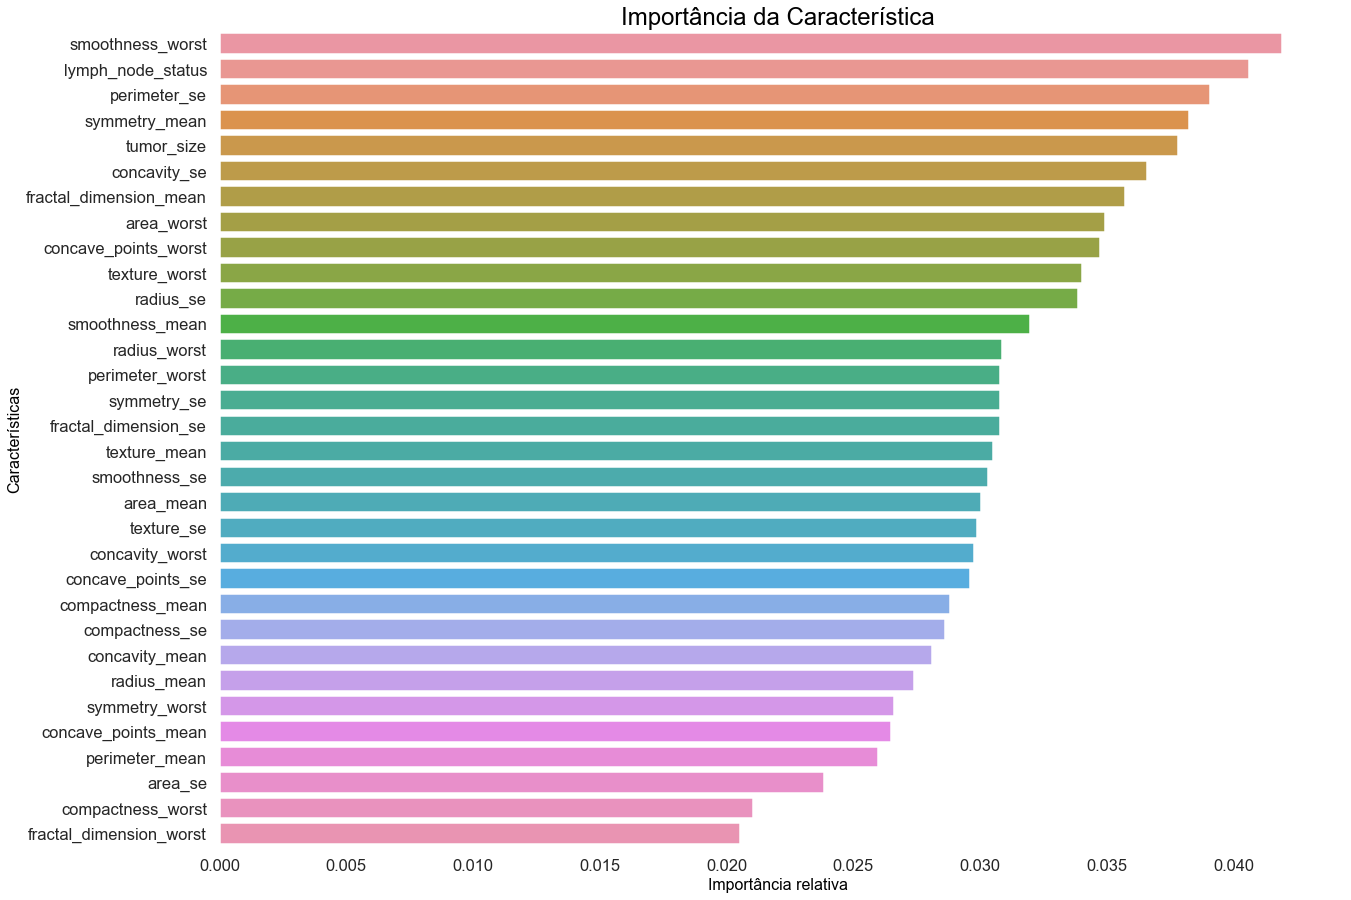

In [91]:
import matplotlib.pyplot as plt

sns.set_color_codes("dark")
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(20,15))
g = sns.barplot(x="importance", y="feature", data=df)
g.axes.set_title('Importância da Característica', fontsize=24,color="black",alpha=2)
g.set_xlabel("Importância relativa", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)

<h3>6.2) Correlação</h3>

<p>Nossa base de dados possui muitas características, portando iremos tentar reduzir essa quantidade olhando para os atributos correlacionados.</p>

Podemos visualizar a correalação das características que separamos nos histogramas (<b><i>radius_mean</b></i>, <b><i>perimeter_mean</b></i>, <b><i>area_mean</b></i>, <b><i>radius_worst</b></i>, <b><i>perimeter_worst</b></i> e <b><i>area_worst</b></i>) através do seguinte gráfico:</p>

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\David\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\David\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


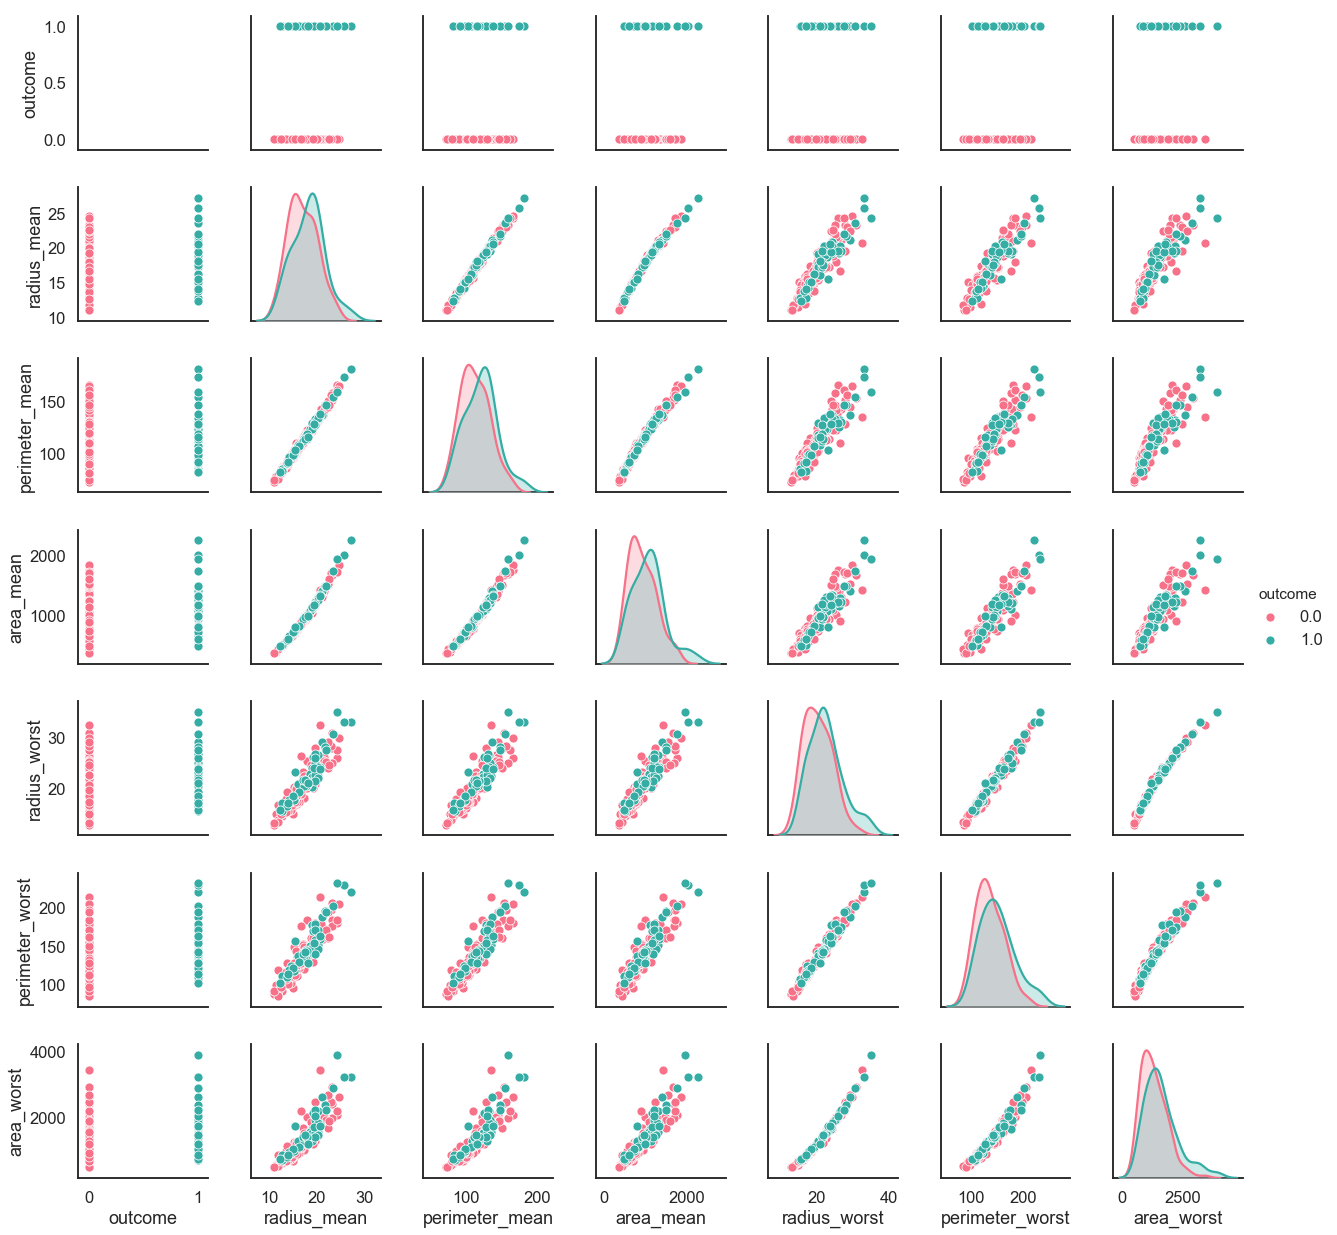

In [92]:
# Identificação de correlações
# Seleciona sete colunas de destaque na seção 6
selected = wpbc[['outcome', 'radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']]

# Exibe gráfico para identificar correlações
sns.pairplot(selected, hue='outcome', palette="husl")

<p>Visualmente, podemos ver que algumas dessas características parecem correlatas, como <b><i>radius_mean</b></i> com <b><i>area_mean</b></i> e <b><i>perimeter_mean</b></i>, ou <b><i>radius_worst</b><i> com <b><i>perimeter_worst</b></i> e <b><i>area_worst</b></i>.</p>

<p>Podemos aprofundar um pouco mais na exploração da correlação de características com um mapa de calor:</p>

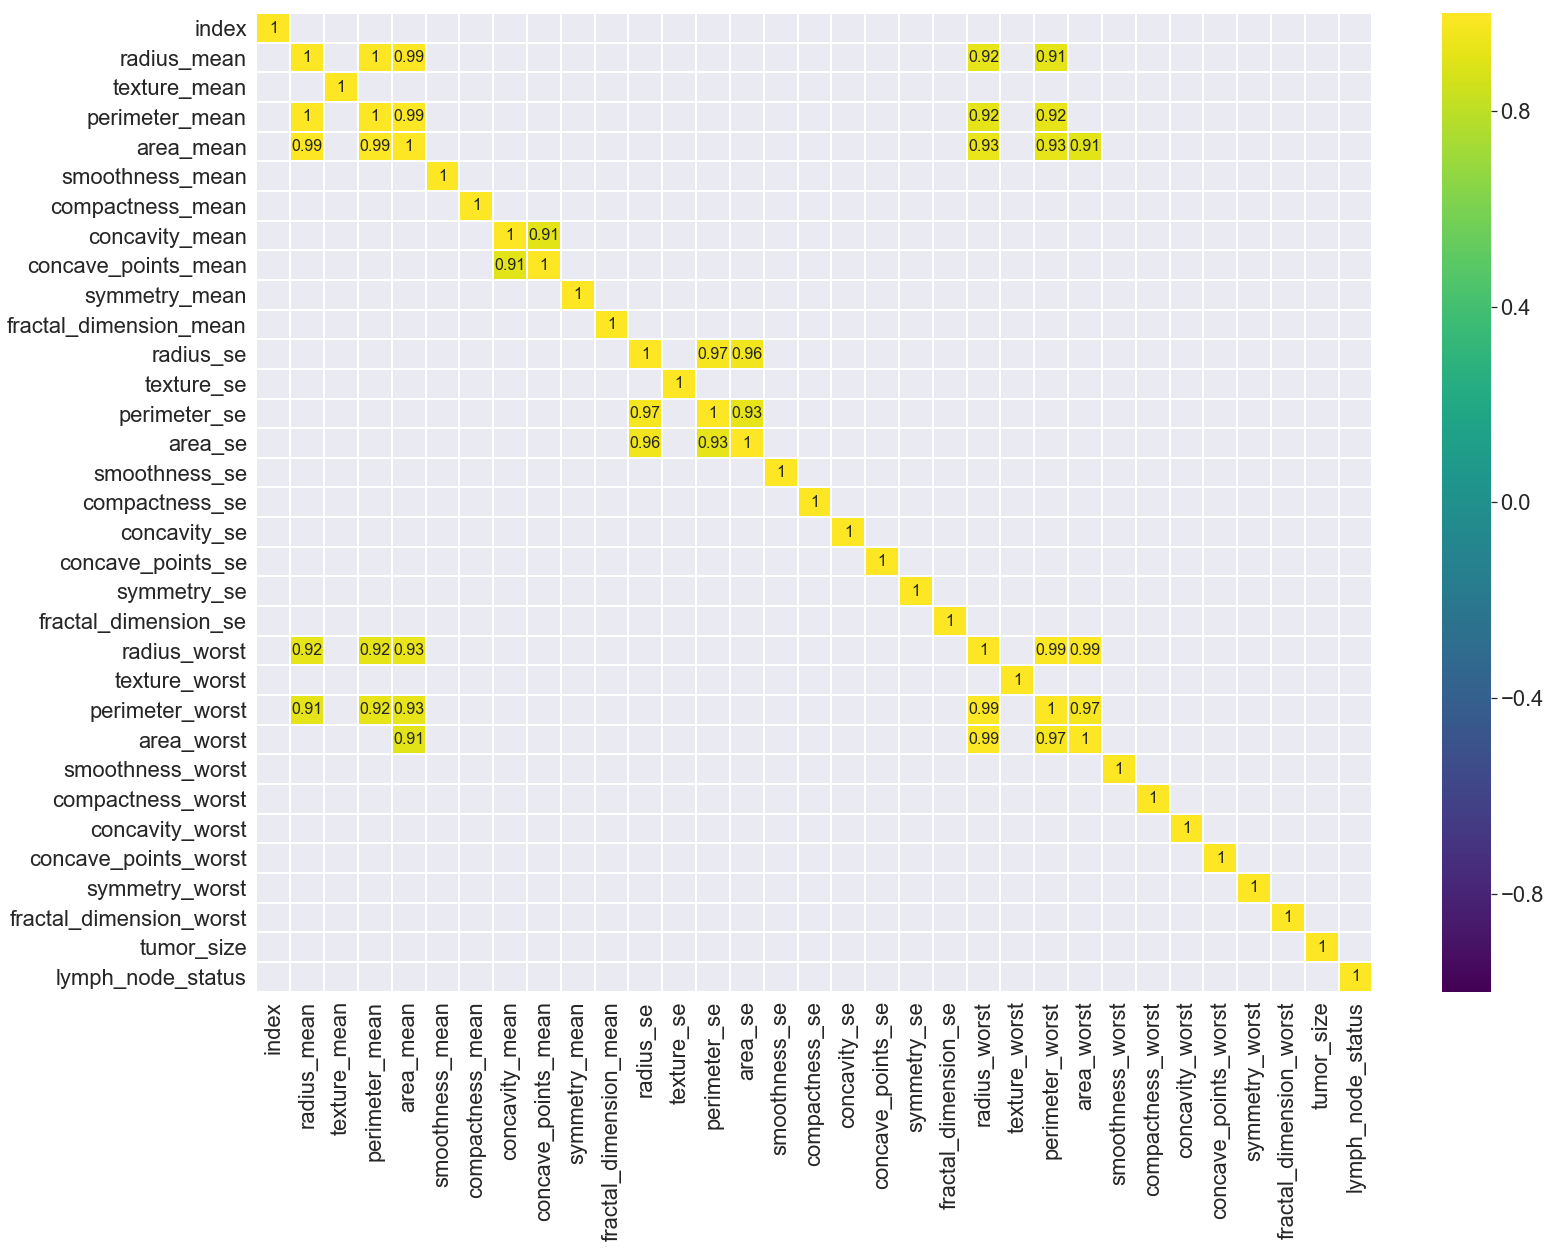

In [93]:
# Gerando a correlação das características
corr = wpbc.drop('outcome', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(25, 18))
sns.set_context("poster")
sns.set(font_scale=2.0)


# Exibindo as correlações maiores que 0.75 e menor que -0.75
c = sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 16}, square=False);

<h3>6.3) Seleção de correlações</h3>

<p>Na matriz quadrada acima, quanto mais próximo do <b><i>1(cor amarela)</i></b> e quanto mais próximo do <b><i>-1(cor roxa)</i></b>, mais forte é a correlação.</p>

<p>Excetuando as entradas da diagonal principal, iremos olhar para os pares de características que fornecem as coordenadas para entradas com valor maior que <b><i>0.9</i></b> ou inferiores a <b><i>-0.9</i></b>. Pela imagem acima, encontramos os sequintes pares de caractrísticas que atendem a esse requisto:

<ul>
    <li>perimeter_mean e radius_mean</li>
    <li>area_mean e radius_mean</li>
    <li>area_mean e perimeter_mean</li>
    <li>concave_points_mean e concavity_mean</li>
    <li>perimeter_se e radius_se</li>
    <li>area_se e radius_se</li>
    <li>area_se e perimeter_se</li> 
    <li>radius_worst e radius_mean</li>
    <li>radius_worst e perimeter_mean</li>
    <li>radius_worst e area_mean</li>
    <li>perimeter_worst e radius_mean</li>
    <li>perimeter_worst e perimeter_mea</li>
    <li>perimeter_worst e area_mean</li>
    <li>perimeter_worst e radius_worst</li>
    <li>area_worst e area_mean</li>
    <li>area_worst e radius_worst</li>
    <li>area_worst e perimeter_worst</li>
</ul>


<h3>6.4) Critério de remoção</h3>
    
<p>Dado um par de características correlacionadas (6.3), será eliminada aquela de menor importância na <b><i>RandomForestClassifier</i></b> (6.1.3). Serão removidas:</p>
<ul>
    <li>perimeter_mean</li>
    <li>area_mean</li>
    <li>radius_worst</li>
    <li>concavity_mean</li>
    <li>perimeter_se</li>
    <li>area_se</li>
    <li>perimeter_worst</li>
    
</ul>

<h3>6.5) Floresta Aleatória após redução de características por correlação</h3>

<p>Agora que sabemos quais características podemos remover, iremos refazer o treinamento com a Floresta Aleatória para tentar melhorar a precisão do nosso modelo.</p>

In [47]:
# Criando novo DataFrame com menos características
data = wpbc.drop(columns=['perimeter_mean', 'area_mean', 'radius_worst', 'concavity_mean',
                          'perimeter_se', 'area_se', 'perimeter_worst'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
index                      194 non-null int64
outcome                    194 non-null float64
radius_mean                194 non-null float64
texture_mean               194 non-null float64
smoothness_mean            194 non-null float64
compactness_mean           194 non-null float64
concave_points_mean        194 non-null float64
symmetry_mean              194 non-null float64
fractal_dimension_mean     194 non-null float64
radius_se                  194 non-null float64
texture_se                 194 non-null float64
smoothness_se              194 non-null float64
compactness_se             194 non-null float64
concavity_se               194 non-null float64
concave_points_se          194 non-null float64
symmetry_se                194 non-null float64
fractal_dimension_se       194 non-null float64
texture_worst              194 non-null float64
area_worst                 194 no

<h4>6.5.1) Procedimentos para classificação</h4>

<p>Primeiramente, vamos separar nossas colunas em dependentes e independentes, e então separar o cojunto de treinamento (70% das amostras) e o conjunto de teste (30% das amostras):</p>

<h4>6.5.2) Treinamento do Modelo e Resultado do treinamento</h4>

<p>Depois de separarmos os conjuntos, podemos aplicar o treinamento. Em seguida, verificamos a precisão do modelo, que nos diz quão frequente nosso classificador estará correto:</p>

In [48]:
# Separa as colunas em dependentes e independentes

from sklearn.model_selection import train_test_split

namesrfc2 = list(data.columns.values[1:])

X2 = wpbc[namesrfc2]  # Características
y2 = wpbc['outcome']  # Rótulo

# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier
# Importa 'metrics' de 'sklearn'
from sklearn import metrics

# Cria um classificador gaussiano
clf2 = RandomForestClassifier(n_estimators = 200)

best_precision2 = 0.0000
for i in range(30):
    # Separa os dados em conjunto de treinamento e conjunto de teste
    # 70% das amostras destinadas para o treinamento e 30% para teste
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

    for k in range (15):
        # Treina o modelo usando o conjunto de treinamento
        clf2.fit(X_train2, y_train2)
        y_pred2 = clf2.predict(X_test2)

        # Modelo de precisão, que diz quão frequente o classificador está correto
        precision2 = metrics.accuracy_score(y_test2, y_pred2)
        if best_precision2 < precision2:
            best_precision2 = precision2
            clf_best2 = clf2
            y_test_best2 = y_test2
            y_pred_best2 = y_pred2

In [50]:
print("Precisão:", best_precision2)

Precisão: 1.0


<h3>Cálculo pelo K-fold</h3>

In [76]:
# Separa as colunas em dependentes e independentes

from sklearn.model_selection import train_test_split

namesrfc2 = list(data.columns.values[1:])

X2 = wpbc[namesrfc2]  # Características
y2 = wpbc['outcome']  # Rótulo

# Treinamento do modelo
# Importa 'RandomForestClassifier' de 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier
# Importa 'metrics' de 'sklearn'
from sklearn import metrics

# Cria um classificador gaussiano
clf2 = RandomForestClassifier(n_estimators = 200)

# Importa o K-fold para separar entre treino e teste
from sklearn.model_selection import KFold

# Valor do K (número de divisões na base de dados)
kf = KFold(n_splits=5)


best_precision2 = 0.0000

for train_index, test_index in kf.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    
    # Treina o modelo usando o conjunto de treinamento
    clf2.fit(X_train2, y_train2)
    y_pred2 = clf2.predict(X_test2)

    # Modelo de precisão, que diz quão frequente o classificador está correto
    precision2 = metrics.accuracy_score(y_test2, y_pred2)
    if best_precision2 < precision2:
        best_precision2 = precision2
        clf_best2 = clf2
        y_test_best2 = y_test2
        y_pred_best2 = y_pred2

In [80]:
print("Precisão:", best_precision2)

Precisão: 0.9210526315789473


<h4>6.5.3) Variáveis:</h4>

<p>Abaixo exibimos o valor das variáveis que obtiveram o resultado acima:</p>

In [81]:
#Conjunto de teste para y
print(y_test_best2)

156    1.0
157    0.0
158    1.0
159    0.0
160    0.0
161    0.0
162    0.0
163    0.0
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
170    0.0
171    0.0
172    0.0
173    1.0
174    1.0
175    0.0
176    0.0
177    0.0
178    0.0
179    0.0
180    0.0
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
188    0.0
189    0.0
190    0.0
191    0.0
192    0.0
193    0.0
Name: outcome, dtype: float64


In [82]:
#Conjunto para predição
print(y_pred_best2)

[1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h4>6.5.4) Importância das Variáveis:</h4>

<p>Assim como fizemos para o modelo que usava todas as variáveis, iremos usar a <b><i>RandomForestClassifier</i></b> para verificar a importância das variáveis no modelo.</p>

In [83]:
# Ordenação das as características importantes pela pontuação
print("Características ordenadas pela pontuação:")
# O número dentro de round é o limite de casas decimais
result2 = sorted(zip(map(lambda x: round(x, 6), clf_best2.feature_importances_), namesrfc2), reverse=True)
print(result2)

# Criando dataframe com o resultado
df2 = pd.DataFrame(data=result2)
df2 = df2.rename(index=str, columns={0: "importance", 1: "feature"})

Características ordenadas pela pontuação:
[(0.043552, 'tumor_size'), (0.039555, 'concavity_se'), (0.037609, 'radius_se'), (0.036797, 'concave_points_mean'), (0.036681, 'texture_se'), (0.035599, 'concavity_worst'), (0.035555, 'smoothness_se'), (0.035064, 'radius_mean'), (0.033305, 'texture_worst'), (0.033273, 'smoothness_worst'), (0.032994, 'concave_points_se'), (0.032726, 'fractal_dimension_worst'), (0.031928, 'compactness_worst'), (0.031486, 'compactness_mean'), (0.031474, 'concave_points_worst'), (0.03098, 'compactness_se'), (0.028938, 'fractal_dimension_mean'), (0.028719, 'symmetry_se'), (0.028656, 'area_worst'), (0.027574, 'texture_mean'), (0.027548, 'fractal_dimension_se'), (0.027312, 'outcome'), (0.026533, 'symmetry_mean'), (0.024493, 'lymph_node_status'), (0.02424, 'symmetry_worst'), (0.022339, 'smoothness_mean')]


<p>Exibindo a ordenação na forma gráfica</p>

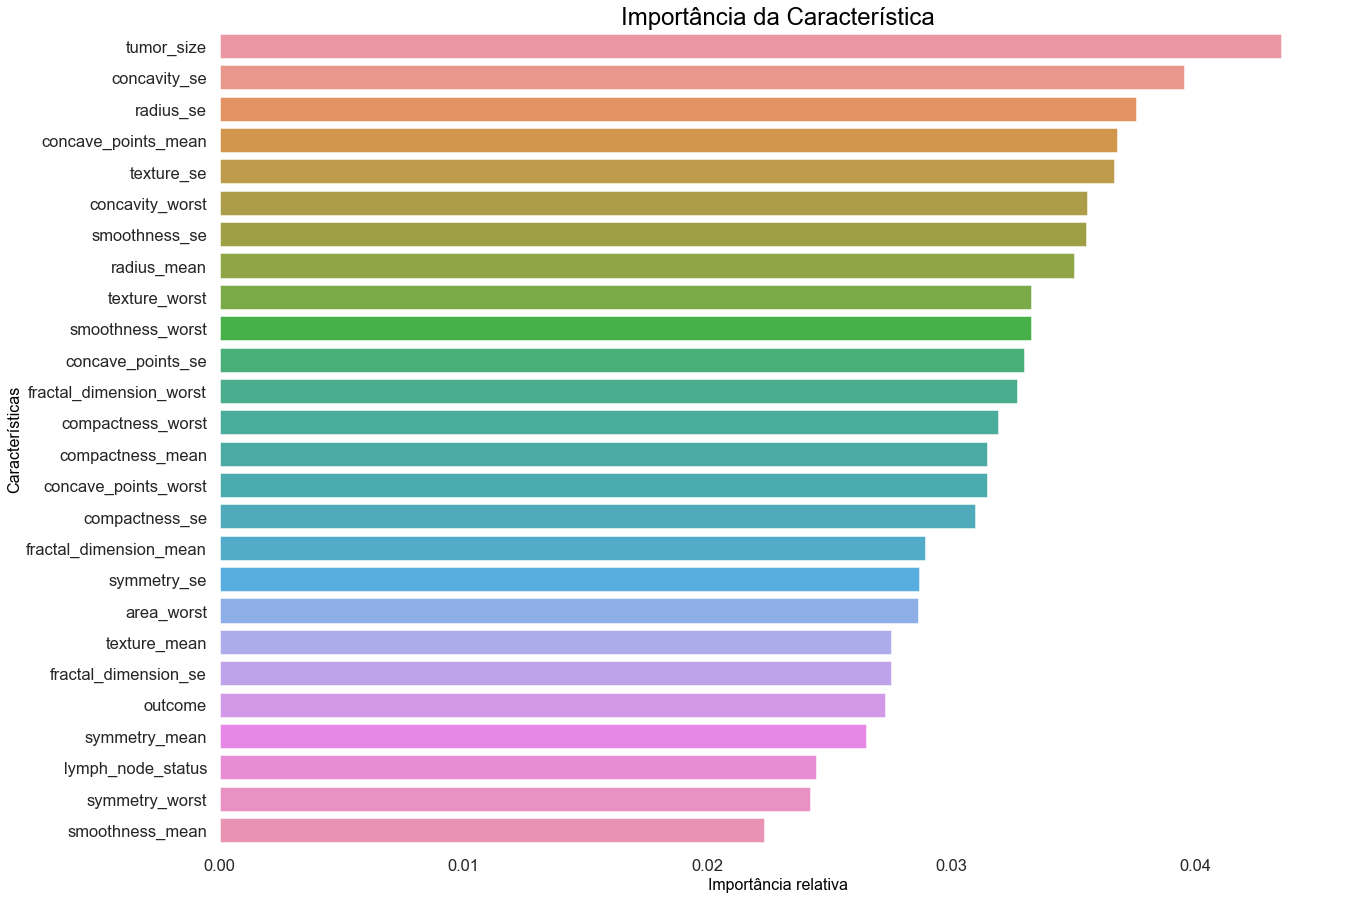

In [84]:
import matplotlib.pyplot as plt

sns.set_color_codes("dark")
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(20,15))
g = sns.barplot(x="importance", y="feature", data=df2)
g.axes.set_title('Importância da Característica', fontsize=24,color="black",alpha=2)
g.set_xlabel("Importância relativa", size = 16,color="black")
g.set_ylabel("Características", size = 16,color="black")
sns.despine(left=True, bottom=True)